# Importing Libraries

In [1]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
import numpy as np
import os, io
from surprise.model_selection import cross_validate, GridSearchCV
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import SVD
from surprise.model_selection import KFold
from surprise.model_selection.split import train_test_split
from surprise import accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading the input data

In [2]:
# Reading csv file to data_df.
data_df = pd.read_csv('train.csv',sep='\t')
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(data_df[['user_id', 'book_id', 'rating']], reader)

In [3]:
data_df.head()

,user_id,book_id,rating
0,12726,7784,5
1,23770,104293,4
2,15669,29291,4
3,649,420180,0
4,10980,7089179,0


In [4]:
# Description of test dataset
data_df.describe()

,user_id,book_id,rating
count,700000.000000,7.000000e+05,700000.000000
mean,18895.764374,4.970340e+06,2.644934
std,10745.949583,8.443227e+06,2.051200
min,0.000000,5.000000e+00,0.000000
25%,9558.000000,7.453200e+04,0.000000
50%,18986.000000,4.349280e+05,3.000000
75%,27946.000000,6.578293e+06,4.000000
max,37230.000000,3.645941e+07,5.000000


In [5]:
# Checking for null values in train dataset
data_df.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [6]:
data_dt = pd.read_csv('test.csv',sep='\t')

In [7]:
data_dt.head()

,user_id,book_id
0,20989,1832332
1,37040,191139
2,36167,28449164
3,9398,24693869
4,29848,8127


In [8]:
data_dt.describe()

,user_id,book_id
count,299606.000000,2.996060e+05
mean,18896.995804,4.956089e+06
std,10733.243044,8.434574e+06
min,0.000000,5.000000e+00
25%,9558.000000,7.425600e+04
50%,19003.000000,4.348330e+05
75%,27889.000000,6.552772e+06
max,37230.000000,3.644507e+07


In [9]:
# Checking for null values in test dataset
data_dt.isnull().sum()

user_id    0
book_id    0
dtype: int64

# Distribution Of Rating

Where 0 is highly rated and 1 is least rated.

In [10]:
data_rating = data_df.rating.value_counts(sort=False)
data_rating

0    239522
1      4448
2     20837
3    105120
4    160393
5    169680
Name: rating, dtype: int64

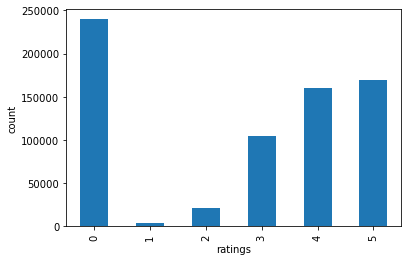

In [11]:
# Plotting the Count of Ratings
data_rating.plot(kind='bar')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

The most rated book has received 11213 ratings.

In [12]:
book_ratings = pd.DataFrame(data_df.groupby('book_id')['rating'].count())
book_ratings.sort_values('rating', ascending=False)

,rating
book_id,
5,11213
3636,7885
24178,5252
157993,5127
2998,4926
...,...
6132063,1
6132066,1
6135185,1


User with id 20755 gave highest number of 4287 ratings.

In [13]:
user_ratings = pd.DataFrame(data_df.groupby('user_id')['rating'].count())
user_ratings.sort_values('rating', ascending=False)

,rating
user_id,
20755,4287
37145,3361
21000,3184
9558,2770
23770,2221
...,...
25040,1
25034,1
25031,1


# Training Model:(Matrix Factorization)

After implementing multiple models svd() is giving better RMSE score then other Models.
Implemented SVD algorithm with The learning rate for all parameters (lr_all) = 0.01,Regularization term for all parameters(reg_all) = 0.1,number of factors(n_factors) = 200 and n_epochs=105.
Used Kfold cross validation with size of splits equall to 5


https://surprise.readthedocs.io/en/stable/matrix_factorization.html


https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators

In [ ]:
algo=SVD(n_epochs=50,n_factors =100)
kf = KFold(n_splits=5)
# trainingSet = data.build_full_trainset()
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

RMSE: 1.6176


In [ ]:
algo=SVD(n_epochs=50,lr_all=0.01,reg_all =0.03,n_factors =200)
kf = KFold(n_splits=5)
trainingSet = data.build_full_trainset()
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    accuracy.rmse(predictions, verbose=True)

Creating column1(col1) 'user_id-book_id' by Joining both user_id and book_id with'-'

In [ ]:
col1=[]
for i in range(len(data_dt)):
    col1.append("{}-{}".format(data_dt.loc[i, "user_id"], data_dt.loc[i, "book_id"]))


Column2(col2) Predicting ratings for given user id and book id take est value and 
adding them to ratings list.

https://surprise.readthedocs.io/en/stable/getting_started.html#train-on-a-whole-trainset-and-the-predict-method

In [ ]:
col2=[]
for _, row in data_dt.iterrows():
    col2.append(algo.predict(row['user_id'], row['book_id']).est)

For Generating csv file,Creating a dictionary and converting to dataframe using pandas library.

In [33]:
d={'user_id-book_id':col1, 'rating': col2}
Predicted_Ratings=pd.DataFrame(d)
Predicted_Ratings

,user_id-book_id,rating
0,20989-1832332,0.268451
1,37040-191139,3.631306
2,36167-28449164,1.708672
3,9398-24693869,0.516789
4,29848-8127,2.995094
...,...,...
299601,15976-38709,4.134968
299602,24853-11312,1.978051
299603,29982-10697427,2.528345
299604,6324-157993,1.790935


Converting Predicted_Ratings to csv file 'Book_RatingPrediction.csv'

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [26]:
csv_name = "Prediction.csv"
Predicted_Ratings.to_csv(csv_name, index=False)
